# Integrantes:

### Joaquín Gomez
### Mauricio Gomez
### Fabio Lancellotti

# Imports

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf

In [3]:
CREDITO = pd.read_csv('actividad2.csv')
CREDITO.head()

,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
0,0.221,0.221,0.800000,5.0,2.0,no,no,no,no,3.9,0,no,no
1,0.265,0.265,0.921875,2.0,2.0,no,no,no,yes,3.2,0,no,no
2,0.372,0.248,0.920398,1.0,2.0,no,no,no,no,3.2,0,no,no
3,0.320,0.250,0.860465,1.0,2.0,no,no,no,no,4.3,0,no,no
4,0.360,0.350,0.600000,1.0,1.0,no,no,no,no,3.2,0,no,no


dir = debt payments to total income ratio
hir = housing expenses to income ratio
lvr = ratio of size of loan to assessed value of property
ccs = consumer credit score from 1 to 6 (a low value being a good score)
mcs = mortgage credit score from 1 to 4 (a low value being a good score)
pbcr = public bad credit record ?
dmi = denied mortgage insurance ?
self = self employed ?
single = is the applicant single ?
uria = 1989 Massachusetts unemployment rate in the applicant's industry
condominium = is unit a condominium ? (was called comdominiom in version 0.2-9 and earlier versions of the package)
black = is the applicant black ?
deny = mortgage application denied ?

# Hipótesis
El evento de recibir una aceptación de crédito va ligado al hecho de estar soltero (single), trabajar dependientemente (self) y vivir en un condominio (condominium).

# Análisis Descriptivo

In [18]:
len(CREDITO)

2381

In [17]:
CREDITO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   dir            2381 non-null   float64
 1   hir            2381 non-null   float64
 2   lvr            2381 non-null   float64
 3   ccs            2381 non-null   float64
 4   mcs            2381 non-null   float64
 5   pbcr           2380 non-null   object 
 6   dmi            2381 non-null   object 
 7   self           2380 non-null   object 
 8   single         2381 non-null   object 
 9   uria           2381 non-null   float64
 10  comdominiom    2381 non-null   int64  
 11  black          2381 non-null   object 
 12  deny           2381 non-null   object 
 13  deny_yes       2381 non-null   int32  
 14  condominiom_1  2381 non-null   int32  
 15  self_yes       2381 non-null   int32  
 16  single_yes     2381 non-null   int32  
dtypes: float64(6), int32(4), int64(1), object(6)
memory 

In [19]:
100 * CREDITO.isnull().sum() / len(CREDITO)

dir              0.000000
hir              0.000000
lvr              0.000000
ccs              0.000000
mcs              0.000000
pbcr             0.041999
dmi              0.000000
self             0.041999
single           0.000000
uria             0.000000
comdominiom      0.000000
black            0.000000
deny             0.000000
deny_yes         0.000000
condominiom_1    0.000000
self_yes         0.000000
single_yes       0.000000
dtype: float64

<Axes: xlabel='deny', ylabel='count'>

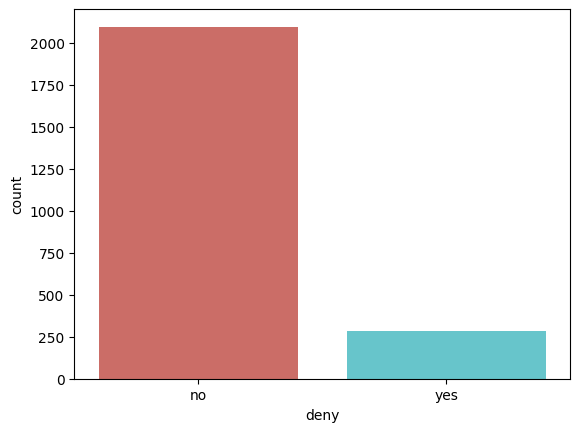

In [20]:
sns.countplot(x='deny' , data=CREDITO , palette='hls')

<Axes: xlabel='deny', ylabel='ccs'>

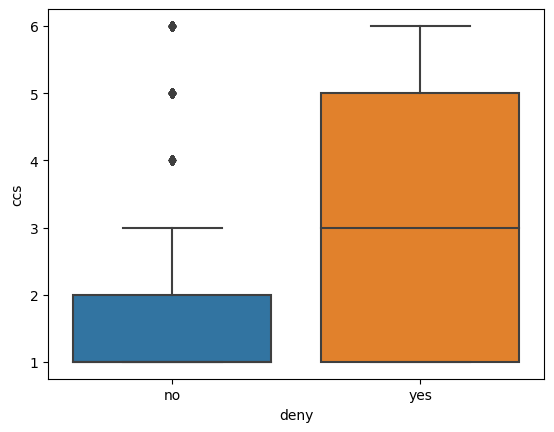

In [21]:
sns.boxplot(x='deny' , y='ccs' , data = CREDITO)

In [22]:
CREDITO.dropna(inplace= True)
CREDITO.isnull().sum()

dir              0
hir              0
lvr              0
ccs              0
mcs              0
pbcr             0
dmi              0
self             0
single           0
uria             0
comdominiom      0
black            0
deny             0
deny_yes         0
condominiom_1    0
self_yes         0
single_yes       0
dtype: int64

In [23]:
100 * CREDITO.isnull().sum() / len(CREDITO)

dir              0.0
hir              0.0
lvr              0.0
ccs              0.0
mcs              0.0
pbcr             0.0
dmi              0.0
self             0.0
single           0.0
uria             0.0
comdominiom      0.0
black            0.0
deny             0.0
deny_yes         0.0
condominiom_1    0.0
self_yes         0.0
single_yes       0.0
dtype: float64

In [24]:
CREDITO.head()

,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny,deny_yes,condominiom_1,self_yes,single_yes
0,0.221,0.221,0.800000,5.0,2.0,no,no,no,no,3.9,0,no,no,0,0,0,0
1,0.265,0.265,0.921875,2.0,2.0,no,no,no,yes,3.2,0,no,no,0,0,0,1
2,0.372,0.248,0.920398,1.0,2.0,no,no,no,no,3.2,0,no,no,0,0,0,0
3,0.320,0.250,0.860465,1.0,2.0,no,no,no,no,4.3,0,no,no,0,0,0,0
4,0.360,0.350,0.600000,1.0,1.0,no,no,no,no,3.2,0,no,no,0,0,0,0


In [25]:
CREDITO.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2380 entries, 0 to 2379
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   dir            2380 non-null   float64
 1   hir            2380 non-null   float64
 2   lvr            2380 non-null   float64
 3   ccs            2380 non-null   float64
 4   mcs            2380 non-null   float64
 5   pbcr           2380 non-null   object 
 6   dmi            2380 non-null   object 
 7   self           2380 non-null   object 
 8   single         2380 non-null   object 
 9   uria           2380 non-null   float64
 10  comdominiom    2380 non-null   int64  
 11  black          2380 non-null   object 
 12  deny           2380 non-null   object 
 13  deny_yes       2380 non-null   int32  
 14  condominiom_1  2380 non-null   int32  
 15  self_yes       2380 non-null   int32  
 16  single_yes     2380 non-null   int32  
dtypes: float64(6), int32(4), int64(1), object(6)
memory usage

# Ejercicio

In [26]:
single_yes = pd.get_dummies(CREDITO['single'], prefix='single', drop_first=True).astype(int)
single_yes.head()

,single_yes
0,0
1,1
2,0
3,0
4,0


In [27]:
self_yes = pd.get_dummies(CREDITO['self'], prefix='self', drop_first=True).astype(int)
self_yes.head()

,self_yes
0,0
1,0
2,0
3,0
4,0


In [28]:
condominiom_1 = pd.get_dummies(CREDITO['comdominiom'], prefix='condominiom', drop_first=True).astype(int)
condominiom_1.head()

,condominiom_1
0,0
1,0
2,0
3,0
4,0


In [29]:
deny_yes = pd.get_dummies(CREDITO['deny'], prefix='deny', drop_first=True).astype(int)
deny_yes.head()

,deny_yes
0,0
1,0
2,0
3,0
4,0


In [30]:
CREDITO = pd.concat([CREDITO, deny_yes], axis=1)
CREDITO = pd.concat([CREDITO, condominiom_1], axis=1)
CREDITO = pd.concat([CREDITO, self_yes], axis=1)
CREDITO = pd.concat([CREDITO, single_yes], axis=1)

# ELIMINAR DUPLICADOS

In [31]:
CREDITO = CREDITO.loc[:,~CREDITO.columns.duplicated()]

In [32]:
CREDITO.head()

,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny,deny_yes,condominiom_1,self_yes,single_yes
0,0.221,0.221,0.800000,5.0,2.0,no,no,no,no,3.9,0,no,no,0,0,0,0
1,0.265,0.265,0.921875,2.0,2.0,no,no,no,yes,3.2,0,no,no,0,0,0,1
2,0.372,0.248,0.920398,1.0,2.0,no,no,no,no,3.2,0,no,no,0,0,0,0
3,0.320,0.250,0.860465,1.0,2.0,no,no,no,no,4.3,0,no,no,0,0,0,0
4,0.360,0.350,0.600000,1.0,1.0,no,no,no,no,3.2,0,no,no,0,0,0,0


In [34]:
formula_reg_log = "deny_yes ~ condominiom_1 + self_yes + single_yes"
modelo_log = smf.logit(formula_reg_log, CREDITO).fit()
modelo_log.summary()

Optimization terminated successfully.
         Current function value: 0.362023
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               deny_yes   No. Observations:                 2380
Model:                          Logit   Df Residuals:                     2376
Method:                           MLE   Df Model:                            3
Date:                Tue, 30 May 2023   Pseudo R-squ.:                 0.01201
Time:                        19:42:28   Log-Likelihood:                -861.62
converged:                       True   LL-Null:                       -872.09
Covariance Type:            nonrobust   LLR p-value:                 0.0001084
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -2.2927      0.097    -23.582      0.000      -2.483      -2.102
condominiom_1     0.1321      0.141      0.935      0.350      -0.145       0.409
self_yes          0.4683      0.176      2.654      0.008       0.122       0.814
single_yes        0.4445      0.133      3.345      0.001       0.184       0.705
=================================================================================
"""

# Respuesta

En base a los datos obtenidos, analizando el coeficiente de cada variable, con su p-valor, se determinó que vivir en condominio o no, no arroja evidencia suficiente para demostrar que vivir en un condominio afecta la probabilidad de recibir un crédito.
Sin embargo, ser soltero o nó y trabajar de manera independiente o no, sí afecta a la probabilidad de recibir un crédito.
Por lo tanto, la hipótesis del jefe se rechazaa. Por otro lado, se dejan muchas variables que pudiesen ser de gran relevancia fuera del modelo.